# K- Nearest Neighbour (KNN)

ML Lab 11

### KNN (K -Nearest Neighbour)
---



Vemula Ananya

KNN Test Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



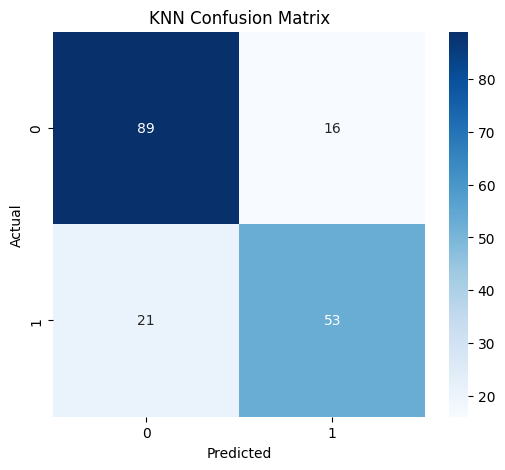

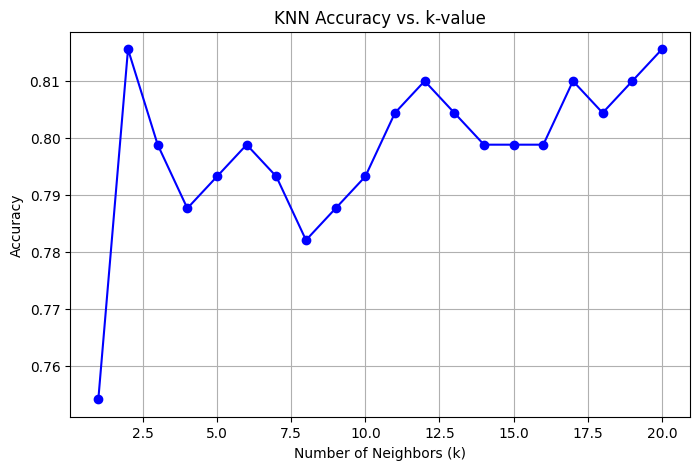

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Titanic dataset
data = pd.read_csv('TitanicDataset.csv')

# Feature Engineering
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex'
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)  # One-hot encode 'Embarked'

# Handle Missing Values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Select Features & Target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (KNN requires scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Test Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

# Finding Optimal K using Elbow Method
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

# Plot Accuracy vs. K-Values
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k-value")
plt.grid(True)
plt.show()
